# Measuring BMI in OpenSAFELY-TPP
This short report describes how BMI can be identified in the OpenSAFELY-TPP database, and the strengths and weaknesses of the methods. This is a living document that will be updated to reflect changes to the OpenSAFELY-TPP database and the patient records within.

## OpenSAFELY
OpenSAFELY is an analytics platform for conducting analyses on Electronic Health Records inside the secure environment where the records are held. This has multiple benefits: 

* We don't transport large volumes of potentially disclosive pseudonymised patient data outside of the secure environments for analysis
* Analyses can run in near real-time as records are ready for analysis as soon as they appear in the secure environment
* All infrastructure and analysis code is stored in GitHub repositories, which are open for security review, scientific review, and re-use

A key feature of OpenSAFELY is the use of study definitions, which are formal specifications of the datasets to be generated from the OpenSAFELY database. This takes care of much of the complex EHR data wrangling required to create a dataset in an analysis-ready format. It also creates a library of standardised and validated variable definitions that can be deployed consistently across multiple projects. 

The purpose of this report is to describe all such variables that relate to BMI, their relative strengths and weaknesses, in what scenarios they are best deployed. It will also describe potential future definitions that have not yet been implemented.

## Available Records
OpenSAFELY-TPP runs inside TPP’s data centre which contains the primary care records for all patients registered at practices using TPP’s SystmOne Clinical Information System. This data centre also imports external datasets from other sources, including A&E attendances and hospital admissions from NHS Digital’s Secondary Use Service, and death registrations from the ONS. More information on available data sources can be found within the OpenSAFELY documentation. 

## Methods
 
We define three variable phenotypes: computed, recorded, and derived BMI. 
* Computed BMI refers to BMI calculated from height and weight measurements. 
* Recorded BMI refers to coded events of BMI. 
* Derived BMI refers to the canonical definition used in the OpenSAFELY backend using the `most_recent_bmi()` function, which returns patients' most recent BMI (in the defined period) either computed from weight and height measurements or, where they are not availble, from recorded BMI values.

To evaluate how well each of these phenotypes are populated, we count the number of patients with each phenotype, number of patients missing each phenotype, and number of patients with multiple phenotypes. We also examine the plausibility of each phenotype by looking at the distribution of measurements and counting values out of the expected range. To evaluate how frequently the BMI phenotypes are recorded, we track the number of new measurements recorded over time and compute the average time between updates.

For each of the checks above, we look at the whole population and across each of the following demographic and clinical subgroups to detect any inequalities.

Demographic covariates:
* Age band 
* Sex
* Ethnicity 
* Region
* IMD

Clinical covariates:
* Dementia
* Diabetes
* Learning disability

## Results

In [1]:
import pandas as pd
import numpy as np

path = "../output/validation/formatted_tables"

In [2]:
def display_ct(unit):
    df_ct = pd.read_csv(f"{path}/{unit}.csv")
    df_ct.loc[df_ct["category"] == "population", "sort"] = 1

    # Sort 
    df_ct = df_ct.sort_values(
        by=["sort","category","subcategory"]
    ).drop(columns=["sort"]).set_index(["category","subcategory"])
    display(df_ct)

### Count of Patients

In [3]:
display_ct("patient_counts")

derived_bmi_num_patients  \
category            subcategory                                         
population          all                                          50.0   
age_band            18-29                                        15.0   
                    30-39                                        10.0   
                    40-49                                         5.0   
                    50-59                                         5.0   
                    60-69                                        10.0   
                    70-79                                        15.0   
                    80+                                          20.0   
dementia            False                                        50.0   
diabetes            1                                             NaN   
                    False                                        50.0   
ethnicity           1                                            25.0   
                    2                                            15.0   
                    3                                            10.0   
                    4                                               -   
                    5                                               -   
imd                 1                                            15.0   
                    2                                            10.0   
                    3                                            10.0   
                    4                                            10.0   
                    5                                            10.0   
                    False                                           -   
learning_disability False                                        50.0   
region              East Midlands                                   -   
                    East of England                                 -   
                    London                                        5.0   
                    North East                                      -   
                    North West                                      -   
                    South East                                   10.0   
                    West Midlands                                   -   
                    Yorkshire and the Humber                        -   
sex                 F                                            30.0   
                    M                                            25.0   

                                             recorded_bmi_num_patients  \
category            subcategory                                          
population          all                                           55.0   
age_band            18-29                                         10.0   
                    30-39                                          5.0   
                    40-49                                         10.0   
                    50-59                                          5.0   
                    60-69                                          5.0   
                    70-79                                         10.0   
                    80+                                           25.0   
dementia            False                                         55.0   
diabetes            1                                                -   
                    False                                         55.0   
ethnicity           1                                             30.0   
                    2                                             15.0   
                    3                                                -   
                    4                                              5.0   
                    5                                                -   
imd                 1                                             10.0   
                    2                                             10.0   
         

### Count of Measurements

In [4]:
display_ct("measurement_counts")

derived_bmi_num_measurements  \
category            subcategory                                              
population          all                                              390.0   
age_band            18-29                                             75.0   
                    30-39                                             35.0   
                    40-49                                             20.0   
                    50-59                                             30.0   
                    60-69                                             30.0   
                    70-79                                             75.0   
                    80+                                              120.0   
dementia            False                                            390.0   
diabetes            1                                                  NaN   
                    False                                            390.0   
ethnicity           1                                                190.0   
                    2                                                100.0   
                    3                                                 60.0   
                    4                                                 20.0   
                    5                                                 15.0   
imd                 1                                                 95.0   
                    2                                                 50.0   
                    3                                                 90.0   
                    4                                                 65.0   
                    5                                                 80.0   
                    False                                             10.0   
learning_disability False                                            390.0   
region              East Midlands                                     15.0   
                    East of England                                   20.0   
                    London                                            40.0   
                    North East                                        40.0   
                    North West                                        30.0   
                    South East                                        80.0   
                    West Midlands                                     30.0   
                    Yorkshire and the Humber                          15.0   
sex                 F                                                215.0   
                    M                                                175.0   

                                              recorded_bmi_num_measurements  \
category            subcategory                                               
population          all                                               390.0   
age_band            18-29                                              40.0   
                    30-39                                              20.0   
                    40-49                                              60.0   
                    50-59                                              40.0   
                    60-69                                              45.0   
                    70-79                                              55.0   
                    80+                                               135.0   
dementia            False                                             390.0   
diabetes            1                                                   5.0   
                    False                                             385.0   
ethnicity           1                                                 190.0   
                    2                                                 100.0   
                    3                                                  25.0   
                    4                              

### Distributions

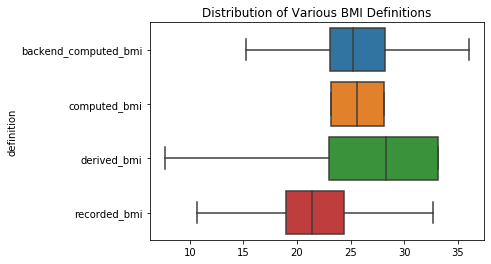

In [5]:
import glob
import matplotlib.pyplot as plt
import os
import seaborn as sns

li_all = []

for file in glob.glob(f"{path}/*distribution.csv"):
    df_temp = pd.read_csv(file)
    df_temp = df_temp.loc[df_temp["category"] == "population"]
    df_temp["definition"] = file.rsplit('/', 1)[-1].rsplit('_', 1)[0]
    li_all.append(df_temp)

df_all = pd.concat(li_all).drop(
    columns=["category","subcategory"]
).set_index("definition").T

sns.boxplot(data=df_all, orient="h", showfliers=False)
plt.title("Distribution of Various BMI Definitions")
plt.show()

In [6]:
def distribution_by_group(category):
    for file in glob.glob(f"{path}/*distribution.csv"):
        df_temp = pd.read_csv(file)
        df_temp = df_temp.loc[df_temp["category"] == f"{category}"].drop(columns=["category"]).set_index("subcategory").T
        definition  = file.rsplit('/', 1)[-1].rsplit('_', 1)[0]
        sns.boxplot(data=df_temp, orient="h", showfliers=False)
        plt.title(f"Distribution of {definition} by {category}")
        plt.show()

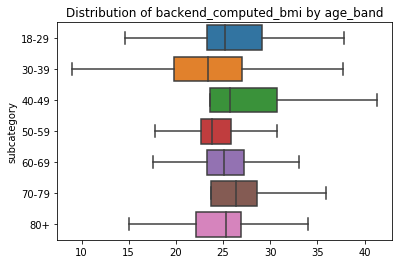

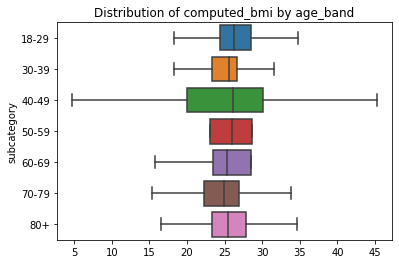

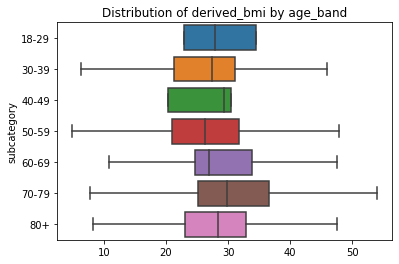

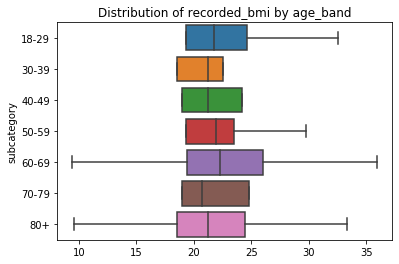

In [7]:
distribution_by_group("age_band")

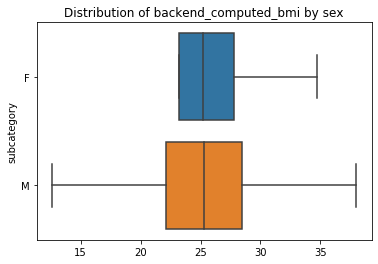

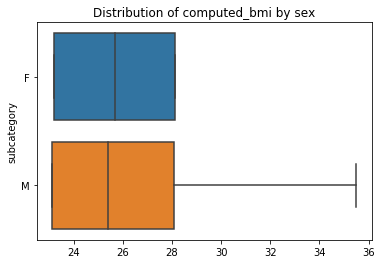

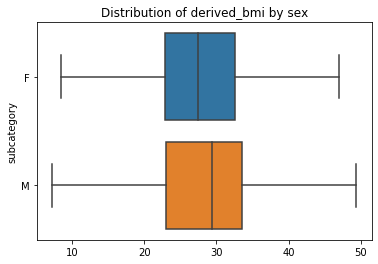

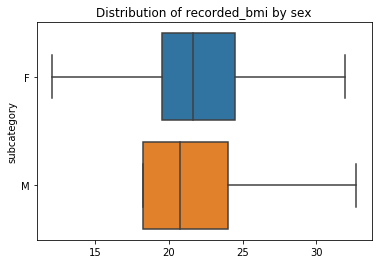

In [8]:
distribution_by_group("sex")

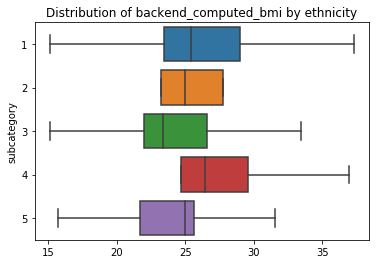

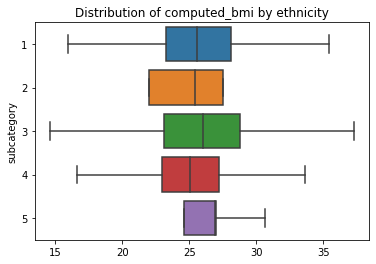

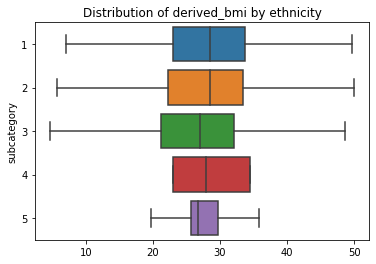

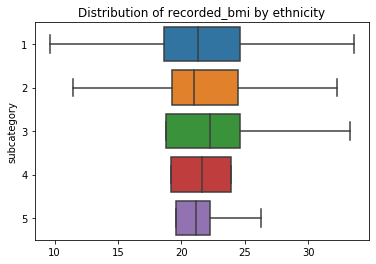

In [9]:
distribution_by_group("ethnicity")

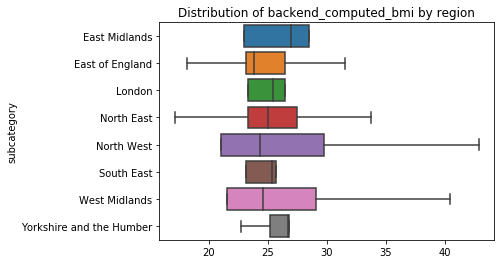

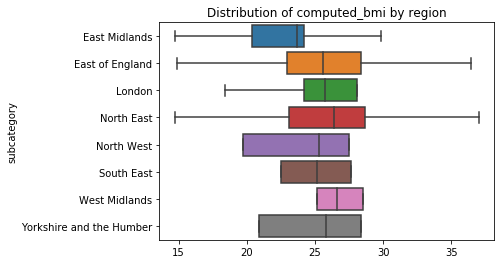

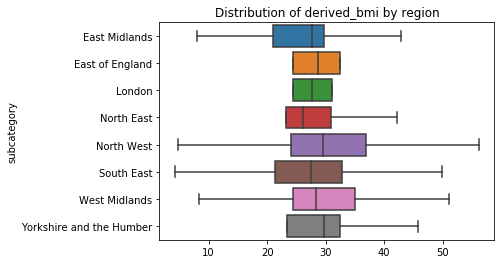

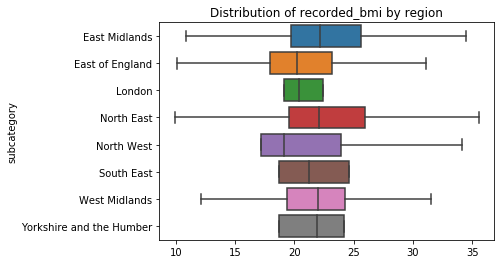

In [10]:
distribution_by_group("region")

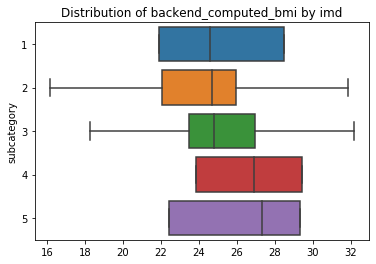

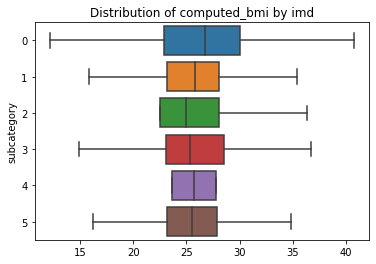

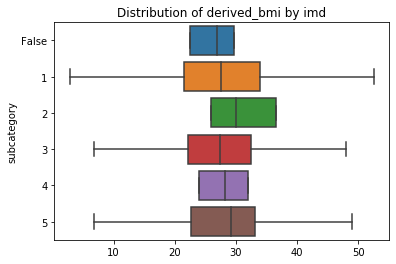

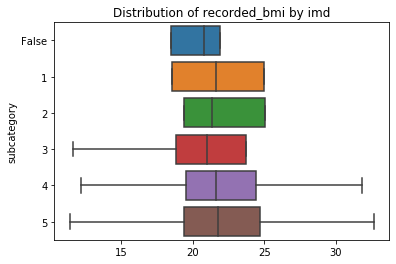

In [11]:
distribution_by_group("imd")

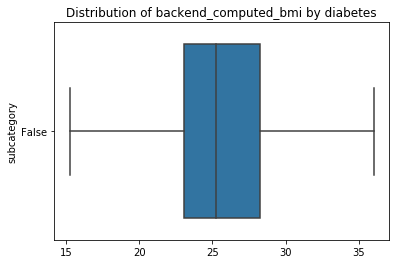

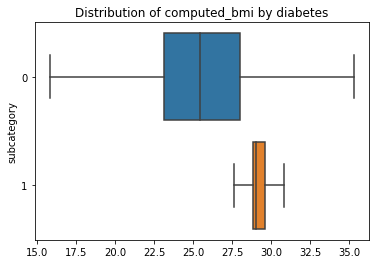

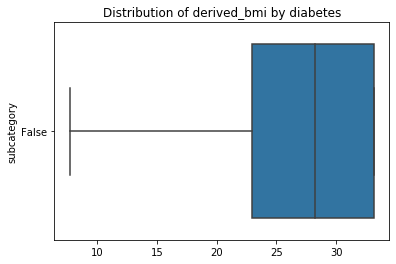

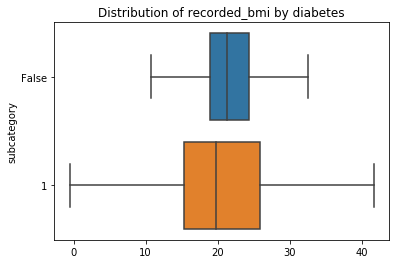

In [12]:
distribution_by_group("diabetes")

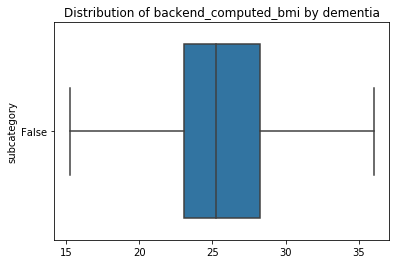

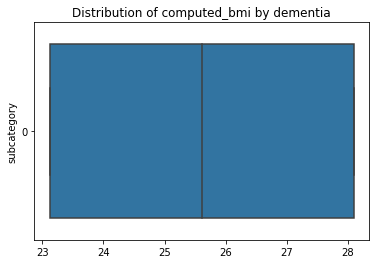

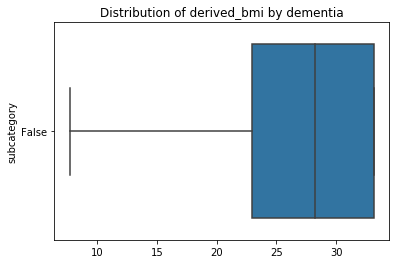

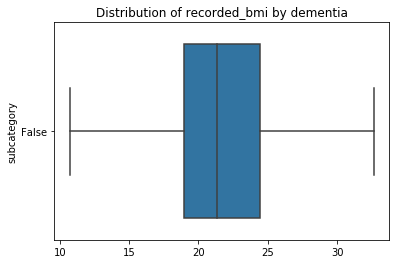

In [13]:
distribution_by_group("dementia")

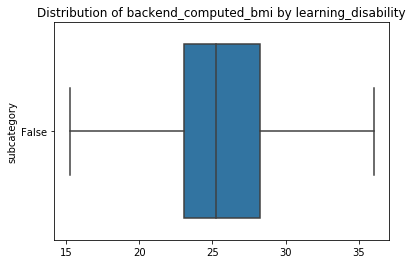

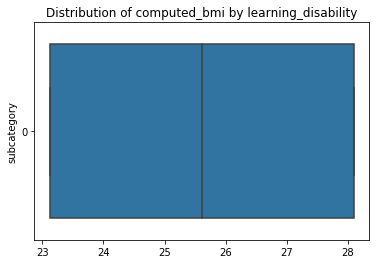

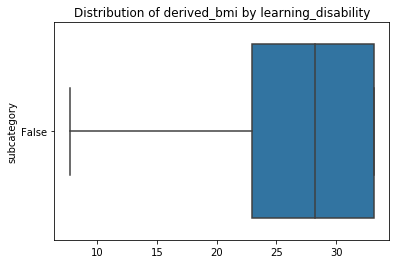

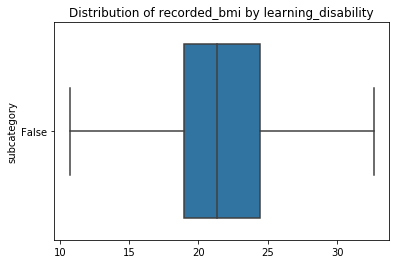

In [14]:
distribution_by_group("learning_disability")

### Records Over Time

In [18]:
def plot_over_time(unit):
    for file in glob.glob(f"{path}/*_{unit}_over_time.csv"):
        df_in = pd.read_csv(file)
        definition  = file.rsplit('/', 1)[-1].rsplit('_', 1)[0]
        df_sub = df_in.loc[df_in["category"] == "population"]
        try:
            sns.lineplot(x="date", y=f"{unit}", data=df_sub)
            plt.title(f"Mean of {definition}")
            plt.show()
        except:
            print(f"No valid {unit} to plot for {definition} over time.")
            plt.close()
            
def plot_over_time_by_group(unit, category):
    for file in glob.glob(f"{path}/*_{unit}_over_time.csv"):
        df_temp = pd.read_csv(file)
        df_temp = df_temp.loc[df_temp["category"] == f"{category}"].drop(columns=["category"])
        definition  = file.rsplit('/', 1)[-1].rsplit('_', 1)[0]
        try:
            sns.lineplot(x="date", y="mean", hue="subcategory", data=df_sub)
            plt.title(f"Mean of {definition}")
            plt.show()
        except:
            print(f"No valid {unit} to plot for {definition} over time by {category}.")
            plt.close()

In [19]:
plot_over_time("records")

No valid records to plot for backend_computed_bmi_records_over over time.
No valid records to plot for computed_bmi_records_over over time.
No valid records to plot for derived_bmi_records_over over time.
No valid records to plot for recorded_bmi_records_over over time.


In [20]:
plot_over_time_by_group("records","age_band")

No valid records to plot for backend_computed_bmi_records_over over time by age_band.
No valid records to plot for computed_bmi_records_over over time by age_band.
No valid records to plot for derived_bmi_records_over over time by age_band.
No valid records to plot for recorded_bmi_records_over over time by age_band.


In [21]:
plot_over_time_by_group("records","sex")

No valid records to plot for backend_computed_bmi_records_over over time by sex.
No valid records to plot for computed_bmi_records_over over time by sex.
No valid records to plot for derived_bmi_records_over over time by sex.
No valid records to plot for recorded_bmi_records_over over time by sex.


In [22]:
plot_over_time_by_group("records","ethnicity")

No valid records to plot for backend_computed_bmi_records_over over time by ethnicity.
No valid records to plot for computed_bmi_records_over over time by ethnicity.
No valid records to plot for derived_bmi_records_over over time by ethnicity.
No valid records to plot for recorded_bmi_records_over over time by ethnicity.


In [23]:
plot_over_time_by_group("records","region")

No valid records to plot for backend_computed_bmi_records_over over time by region.
No valid records to plot for computed_bmi_records_over over time by region.
No valid records to plot for derived_bmi_records_over over time by region.
No valid records to plot for recorded_bmi_records_over over time by region.


In [24]:
plot_over_time_by_group("records","imd")

No valid records to plot for backend_computed_bmi_records_over over time by imd.
No valid records to plot for computed_bmi_records_over over time by imd.
No valid records to plot for derived_bmi_records_over over time by imd.
No valid records to plot for recorded_bmi_records_over over time by imd.


In [26]:
plot_over_time_by_group("records","diabetes")

No valid records to plot for backend_computed_bmi_records_over over time by diabetes.
No valid records to plot for computed_bmi_records_over over time by diabetes.
No valid records to plot for derived_bmi_records_over over time by diabetes.
No valid records to plot for recorded_bmi_records_over over time by diabetes.


In [27]:
plot_over_time_by_group("records","dementia")

No valid records to plot for backend_computed_bmi_records_over over time by dementia.
No valid records to plot for computed_bmi_records_over over time by dementia.
No valid records to plot for derived_bmi_records_over over time by dementia.
No valid records to plot for recorded_bmi_records_over over time by dementia.


In [25]:
plot_over_time_by_group("records","learning_disability")

No valid records to plot for backend_computed_bmi_records_over over time by learning_disability.
No valid records to plot for computed_bmi_records_over over time by learning_disability.
No valid records to plot for derived_bmi_records_over over time by learning_disability.
No valid records to plot for recorded_bmi_records_over over time by learning_disability.


### Means Over Time

In [28]:
plot_over_time("means")

No valid means to plot for backend_computed_bmi_means_over over time.
No valid means to plot for computed_bmi_means_over over time.
No valid means to plot for derived_bmi_means_over over time.
No valid means to plot for recorded_bmi_means_over over time.


In [28]:
plot_over_time_by_group("means", "age_band")

No valid means to plot for backend_computed_bmi_means_over over time by age_band.
No valid means to plot for computed_bmi_means_over over time by age_band.
No valid means to plot for derived_bmi_means_over over time by age_band.
No valid means to plot for recorded_bmi_means_over over time by age_band.


In [29]:
plot_over_time_by_group("means", "sex")

No valid means to plot for backend_computed_bmi_means_over over time by sex.
No valid means to plot for computed_bmi_means_over over time by sex.
No valid means to plot for derived_bmi_means_over over time by sex.
No valid means to plot for recorded_bmi_means_over over time by sex.


In [30]:
plot_over_time_by_group("means", "ethnicity")

No valid means to plot for backend_computed_bmi_means_over over time by ethnicity.
No valid means to plot for computed_bmi_means_over over time by ethnicity.
No valid means to plot for derived_bmi_means_over over time by ethnicity.
No valid means to plot for recorded_bmi_means_over over time by ethnicity.


In [31]:
plot_over_time_by_group("means", "region")

No valid means to plot for backend_computed_bmi_means_over over time by region.
No valid means to plot for computed_bmi_means_over over time by region.
No valid means to plot for derived_bmi_means_over over time by region.
No valid means to plot for recorded_bmi_means_over over time by region.


In [32]:
plot_over_time_by_group("means", "imd")

No valid means to plot for backend_computed_bmi_means_over over time by imd.
No valid means to plot for computed_bmi_means_over over time by imd.
No valid means to plot for derived_bmi_means_over over time by imd.
No valid means to plot for recorded_bmi_means_over over time by imd.


In [33]:
plot_over_time_by_group("means", "diabetes")

No valid means to plot for backend_computed_bmi_means_over over time by diabetes.
No valid means to plot for computed_bmi_means_over over time by diabetes.
No valid means to plot for derived_bmi_means_over over time by diabetes.
No valid means to plot for recorded_bmi_means_over over time by diabetes.


In [34]:
plot_over_time_by_group("means", "dementia")

No valid means to plot for backend_computed_bmi_means_over over time by dementia.
No valid means to plot for computed_bmi_means_over over time by dementia.
No valid means to plot for derived_bmi_means_over over time by dementia.
No valid means to plot for recorded_bmi_means_over over time by dementia.


In [35]:
plot_over_time_by_group("means", "learning_disability")

No valid means to plot for backend_computed_bmi_means_over over time by learning_disability.
No valid means to plot for computed_bmi_means_over over time by learning_disability.
No valid means to plot for derived_bmi_means_over over time by learning_disability.
No valid means to plot for recorded_bmi_means_over over time by learning_disability.


### Out of Bounds

### Less than Minimum

In [15]:
def display_oob(unit):
    df_ct = pd.read_csv(f"{path}/{unit}.csv", index_col=0)
    df_ct.loc[df_ct["category"] == "population", "sort"] = 1
    # Sort 
    df_ct = df_ct.sort_values(
        by=["sort","category","subcategory"]
    ).drop(columns=["sort"]).set_index(["category","subcategory"])
    display(df_ct)

In [16]:
display_oob("less_than_min")

count_derived_bmi mean_derived_bmi  \
category   subcategory                                                   
population all                                      -                -   
ethnicity  1                                        -                -   
           2                                        -                -   
           3                                        -                -   
           4                                        -                -   
           5                                        -                -   
imd        0                                        -                -   
           1                                        -                -   
           2                                        -                -   
           3                                        -                -   
           4                                        -                -   
           5                                        -                -   
region     East Midlands                            -                -   
           East of England                          -                -   
           London                                   -                -   
           North East                               -                -   
           North West                               -                -   
           South East                               -                -   
           West Midlands                            -                -   
           Yorkshire and the Humber                 -                -   
sex        F                                        -                -   
           M                                        -                -   

                                    count_recorded_bmi mean_recorded_bmi  \
category   subcategory                                                     
population all                                       -                 -   
ethnicity  1                                         -                 -   
           2                                         -                 -   
           3                                         -                 -   
           4                                         -                 -   
           5                                         -                 -   
imd        0                                         -                 -   
           1                                         -                 -   
           2                                         -                 -   
           3                                         -                 -   
           4                                         -                 -   
           5                                         -                 -   
region     East Midlands                             -                 -   
           East of England                           -                 -   
           London                                    -                 -   
           North East                                -                 -   
           North West                                -                 -   
           South East                                -                 -   
           West Midlands                             -                 -   
           Yorkshire and the Humber                  -                 -   
sex        F                                         -                 -   
           M                                         -                 -   

                                    count_backend_computed_bmi  \
category   subcategory                                           
population all                                               -   
ethnicity  1                                                 -   
           2                                                 -   
           3                                                 -   
           4                          

In [17]:
display_oob("greater_than_max")

count_derived_bmi  \
category            subcategory                                   
population          all                                   390.0   
age_band            18-29                                  75.0   
                    30-39                                  35.0   
                    40-49                                  20.0   
                    50-59                                  30.0   
                    60-69                                  30.0   
                    70-79                                  75.0   
                    80+                                   120.0   
dementia            False                                 390.0   
diabetes            1                                       NaN   
                    False                                 390.0   
ethnicity           1                                     190.0   
                    2                                     100.0   
                    3                                      60.0   
                    4                                      20.0   
                    5                                      15.0   
imd                 1                                      95.0   
                    2                                      50.0   
                    3                                      90.0   
                    4                                      65.0   
                    5                                      80.0   
                    False                                  10.0   
learning_disability False                                 390.0   
region              East Midlands                          15.0   
                    East of England                        20.0   
                    London                                 40.0   
                    North East                             40.0   
                    North West                             30.0   
                    South East                             80.0   
                    West Midlands                          30.0   
                    Yorkshire and the Humber               15.0   
sex                 F                                     215.0   
                    M                                     175.0   

                                              mean_derived_bmi  \
category            subcategory                                  
population          all                              28.206541   
age_band            18-29                            28.216687   
                    30-39                            26.572141   
                    40-49                            27.077135   
                    50-59                            26.105056   
                    60-69                            29.609884   
                    70-79                            29.666968   
                    80+                              28.073124   
dementia            False                            28.206541   
diabetes            1                                      NaN   
                    False                            28.206541   
ethnicity           1                                28.874766   
                    2                                27.972291   
                    3                                26.529466   
                    4                                27.496809   
                    5                                28.834653   
imd                 1                                27.569743   
                    2                                30.428704   
                    3                                27.626800   
                    4                                28.386614   
                    5                                28.349382   
                    False                            26.291966   
learning_disability False                            28.206541   
region              East Midlands                 